##Carga de librerías

In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [2]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole, ShowMol
from rdkit.Chem import PyMol
from rdkit.Chem import Draw
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import copy

In [3]:
import pandas as pd
import os
import numpy as np

#Código Molecula

##Carga de base de datos principal para moleculas  (molecule)


In [4]:
#Comma separated value text file containing information on the
#entire dataset of acceptor molecules, 51280 in total

dataOfAceptors = pd.read_csv('../db/mmc2.csv')
dataOfAceptors.head()


,index,inchikey,smiles,HOMO_calc,LUMO_calc,LUMO_calib,LUMO_calib_stds,HOMO_calib,HOMO_calib_stds,GAP_calib,...,Jsc_calc,FF_calc,EQE_calc,PCE_calib,Voc_calib,Jsc_calib,FF_calib,EQE_calib,PCE_cdiff,PCE_calib_plus
0,0,XYUYDHFIISREFR-UHFFFAOYNA-N,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,-6.236230,-3.127170,-3.708691,0.272688,-6.310338,0.223776,2.601647,...,8.564253,0.65,0.65,2.112606,0.991309,32.798726,0.65,0.65,1.237374,1.232105
1,1,PHWHUZBDROGCOQ-UHFFFAOYNA-N,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,-6.339430,-3.704750,-4.256720,0.271643,-6.461128,0.222483,2.204408,...,30.446926,0.65,0.65,1.980828,0.443280,68.772742,0.65,0.65,0.011908,0.572272
2,2,OPESLBWKEFWREF-UHFFFAOYNA-N,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,-6.406977,-3.581290,-4.091198,0.264892,-6.466049,0.219944,2.374851,...,18.951200,0.65,0.65,2.030503,0.608802,51.330433,0.65,0.65,0.652955,1.160089
3,3,ZBIIYLIGWGDVFT-UHFFFAOYNA-N,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,-6.438564,-3.095938,-3.646241,0.268056,-6.534126,0.221199,2.887886,...,4.756826,0.65,0.65,1.130062,1.053759,16.504735,0.65,0.65,0.634280,0.394002
4,4,SHQQQXHEKIZGPP-UHFFFAOYNA-N,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,-6.859940,-3.555118,-4.037025,0.268006,-6.913465,0.220382,2.876440,...,5.303097,0.65,0.65,0.729398,0.662975,16.932270,0.65,0.65,0.334902,0.000000


In [5]:
#Comma separated value text file containing information on the 112
#fragments used to build the library of molecules

data3 = pd.read_csv('../db/mmc3.csv')
data3.head()


,index,group,label,smiles,PCE_stats,PCE_mean,PCE_std,Global_pop_num,Global_pop_percent,PCE < 8_pop_num,...,PCE > 8_pop_num,PCE > 8_pop_percent,pop_diff,Z,Z_8.0,Z_8.5,Z_9.0,Z_9.5,Z_10.0,Z_10.5
0,62,terminal,f 62,C=C1N(C2=CC=CC=C2O1)C,"{'25%': 1.4897794525169601, 'std': 2.001056154...",2.888581,2.001056,424,0.827220,420,...,4,3.076923,2.255407,2.816744,2.816744,4.311612,1.198000,NaN,NaN,NaN
1,63,terminal,f 63,C=C1N(C)C2=CC=CC=C2C1(C)C,"{'25%': 0.93461738578791276, 'std': 1.53869154...",2.090048,1.538692,2199,4.290229,2195,...,4,3.076923,-1.216475,-0.699465,-0.699465,-0.694377,0.258349,-0.258720,NaN,NaN
2,64,terminal,f 64,C=C1N(C2=CC=CC=C2S1)C,"{'25%': 1.3221597699351173, 'std': 1.374290633...",2.267738,1.374291,846,1.650538,842,...,3,2.307692,0.660749,1.261868,1.261868,0.691185,1.705228,2.157016,2.739656,3.150844
3,65,terminal,f 65,CC(C1=CC=CC=C1N2C)(C)C2=CC=C3C(C(C=CC=C4)=C4C3...,"{'25%': 1.1843245291909152, 'std': 0.962142697...",1.952339,0.962143,267,0.520915,267,...,0,0.000000,-0.522249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,terminal,f 66,O=C(C1=CC=C2N(C)C3=CC=CC=C3S2)C4=C(C1=C(C#N)C#...,"{'25%': 1.3223404252748248, 'std': 1.030409134...",2.120907,1.030409,535,1.043780,535,...,0,0.000000,-1.046455,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#– Comma separated value text file containing information on fingerprint
#analysis utilizing 8192 bits with a connectivity radius of 4.

data4 = pd.read_csv('../db/mmc4.csv')
data4.head()


,Bit,All_count,Top_count,All Pop %,Top Pop %,radius_mean,radius_std,Z
0,0,59,0,0.115108,0.000000,3.067797,1.176960,NaN
1,1,63,0,0.122912,0.000000,4.000000,0.000000,NaN
2,2,214,1,0.417512,0.763359,3.205607,0.622601,0.614674
3,3,254,0,0.495552,0.000000,3.968504,0.174654,NaN
4,4,144,0,0.280943,0.000000,3.812500,0.390312,NaN


In [7]:
#Comma separated value text file containing
#information on molecules used for HOMO-LUMO GP calibration

data5 = pd.read_csv('../db/mmc5.csv')
data5.head()



,key,smiles,HOMO_exp,LUMO_exp,HOMO_calc,LUMO_calc
0,c7,CN(C1=O)C(C2C=C(OC)C3=C(C2=C1C=C4)C4=C5C6=C3C=...,-5.48,-3.84,-5.506927,-3.057544
1,c9,O=C(C1=C2C3=C(C=CC24)C5=C(C6=C7C=C5)C(CC=C6C(N...,-5.71,-3.71,-5.654385,-3.066683
2,c10,O=C(C1=C2C3=C(C(C(C=C4C(N(C(C)C)C5=O)=O)C6=C7C...,-5.94,-3.84,-5.716410,-3.307659
3,c14,O=C(C1=C2C(C(C3=C4C(C5C6=C7C=CC(C(N(C(C)C)C8=O...,-5.81,-3.61,-5.770852,-3.071316
4,d1,O=C1C(C2=C(C3=CC=C(S3)C4=CC=C(C(F)(F)F)C=C4)N1...,-5.26,-3.52,-5.280874,-3.223849


In [8]:
#– Comma separated value text file containing information
#on molecules used for PCE GP calibration

data6 = pd.read_csv('../db/mmc6.csv')
data6.head()


,key,name,donor,smiles,HOMO_calc,LUMO_calc,PCE_exp,Source,HOMO_calib,LUMO_calib,PCE_calc,PCE_calib,molW,PCE_calib_plus,PCE_calib_plus_std
0,1,1,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6ccc(c7ccc(...,-6.2060,-3.7565,0.25,NaN,-5.769127,-3.818783,2.746719,5.858438,418.408,1.376496,1.331254
1,2,2,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(-n6c(=O)c7ccc8c9ccc...,-6.2310,-3.8095,3.20,NaN,-5.918082,-4.044682,2.737661,4.883912,806.746,2.130566,1.275193
2,3,3,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc(...,-6.0405,-3.8651,0.41,NaN,-5.750096,-3.868918,3.900138,6.141742,916.927,2.298419,1.280298
3,4,4,P3HT,COc1cc2c(=O)n(C)c(=O)c3ccc4c5c(-c6ccc(-c7cc8c(...,-5.7617,-3.6931,0.76,NaN,-5.654797,-3.843035,5.592203,7.021113,1037.031,2.560097,1.292685
4,5,5,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc8...,-5.9508,-3.7279,2.35,NaN,-5.733852,-3.721853,4.204648,5.937610,1149.187,2.793039,1.296141


##Conformers y minimización de energía utilizando el método MMFF, comprobado por los enlaces que se muestran al inicio.

###Generación de conformers

In [9]:
#función que genera conformers
def gen_conformers(mol, numConfs=100, maxAttempts=1000, pruneRmsThresh=0.1, useExpTorsionAnglePrefs=True, useBasicKnowledge=True, enforceChirality=True):
  ids = AllChem.EmbedMultipleConfs(mol, numConfs=numConfs, maxAttempts=maxAttempts, pruneRmsThresh=pruneRmsThresh, useExpTorsionAnglePrefs=useExpTorsionAnglePrefs, useBasicKnowledge=useBasicKnowledge, enforceChirality=enforceChirality, clearConfs=True, randomSeed=-1, numThreads=0)
  return list(ids)
	
################################################################################
smiles_molecules = dataOfAceptors.smiles
molecule = Chem.MolFromSmiles(smiles_molecules[0])
m = Chem.AddHs(molecule)
numConfs = 10
minimizeIterations = 2000
conformerIds = gen_conformers(m, numConfs=numConfs)

###MMFF94

In [10]:
def calc_energy(mol, conformerId, minimizeIts):
  ff = AllChem.MMFFGetMoleculeForceField(mol, AllChem.MMFFGetMoleculeProperties(mol), confId=conformerId)
  ff.Initialize()
  ff.CalcEnergy()
  results = {}
  if minimizeIts > 0:
    results["converged"] = ff.Minimize(maxIts=minimizeIts)
  results["energy_abs"] = ff.CalcEnergy()
  molblock.append(Chem.rdmolfiles.MolToMolBlock(m, confId=conformerId))
  energy_conformers.append(results)
  return results

def unique(x):
  x = np.array(x)
  return(np.unique(x))


energy_conformers = []
conformerPropsDict = {}
moleculeConf = {}
molblock = []
molblock.append(Chem.rdmolfiles.MolToMolBlock(m))
for conformerId in conformerIds:
  # energy minimise (optional) and energy calculation
  props = calc_energy(m, conformerId, minimizeIterations)
  conformerPropsDict[conformerId+1] = props

###Se comprueba si existen conformers iguales en energía mínima

In [65]:
energy_abs = []
for i in range(len(conformerPropsDict)): 
    energy_abs.append(conformerPropsDict[i+1]['energy_abs'])
unique(energy_abs)

array([49.11916678, 49.1191668 , 49.31139369, 50.94921349, 51.16121976,
       51.2875826 , 51.82791252, 52.86292938, 53.60577152, 56.0445908 ])

##DFT Using Orca

In [12]:
import os
f = open("../docs/chemistry/orca_files/conf", "r")

folder = str(f.readline()).strip()
inpFile = str(f.readline()).strip()
f.close()


password = 'Aasdf1234$'
command = f'sudo -S /root/orca/orca {inpFile}.inp > {inpFile}.out' #can be any command but don't forget -S as it enables input from stdin
os.system('cd /usr/src/app/docs/chemistry/orca_files/%s/ && echo %s | %s' % (folder, password, command))


##Si aparece 0 significa que ejecutó correctamente, si aparece otro número el programa no se ejecutó bien, revisar archivo inp, o permisos.

0

In [13]:
#Machine Learning

In [14]:
data5.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        94 non-null     object 
 1   smiles     94 non-null     object 
 2   HOMO_exp   94 non-null     float64
 3   LUMO_exp   94 non-null     float64
 4   HOMO_calc  94 non-null     float64
 5   LUMO_calc  94 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.5+ KB


&lt;AxesSubplot:&gt;

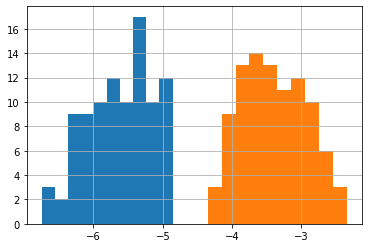

In [15]:
data5['HOMO_exp'].hist()
data5['LUMO_exp'].hist()

&lt;AxesSubplot:&gt;

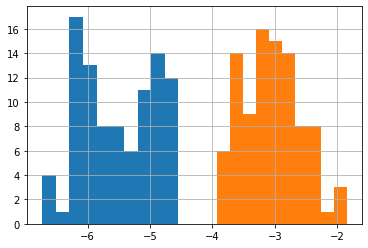

In [16]:
data5['HOMO_calc'].hist()
data5['LUMO_calc'].hist()

&lt;matplotlib.collections.PathCollection at 0x7fa9564e7590&gt;

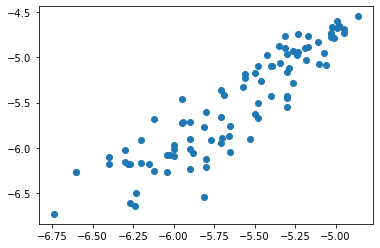

In [17]:
plt.scatter(data5['HOMO_exp'], data5['HOMO_calc'])

##gaussian Process

scores: [-1.15661217  0.11714481  0.5608822   0.44767861  0.21889158]
-51.45123884742225
3.428070800032632


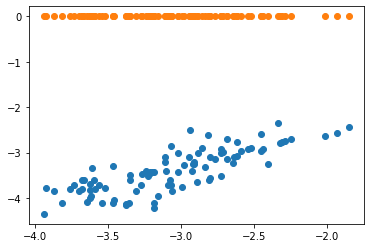

In [18]:
X = data5['LUMO_calc']
y = data5['LUMO_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score



gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)


print(f'scores: {cross_val_score(gpr, X_val, y_val, cv=5)}')

  


predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

0.8491604149593655
0.17676589667908876


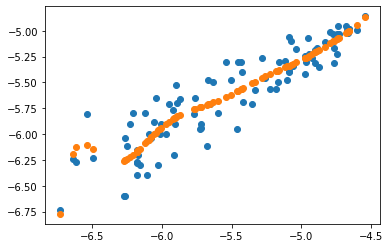

In [19]:
X = data5['HOMO_calc']
y = data5['HOMO_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold

gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

kf = KFold(n_splits=32, shuffle=True, random_state=25)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['HOMO_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['HOMO_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['HOMO_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['HOMO_exp']).reshape(-1, 1)
    #Train the model
    gpr.fit(X_train, y_train) #Training the model

predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

In [20]:
homo_exp_andres = pd.DataFrame(predict, columns=['HOMO_cal_projecto'])
homo_exp = pd.DataFrame(y, columns=['HOMO_exp'])

In [21]:
homo_data =  pd.concat([homo_exp_andres, homo_exp], axis=1, sort=False)
homo_data

,HOMO_cal_projecto,HOMO_exp
0,-5.620132,-5.480000
1,-5.706550,-5.710000
2,-5.735382,-5.940000
3,-5.760116,-5.810000
4,-5.457848,-5.260000
...,...,...
89,-6.143150,-6.300093
90,-6.258580,-6.600097
91,-5.693946,-5.500081
92,-6.255835,-6.600097


0.8491925780849217
0.16241950084746093


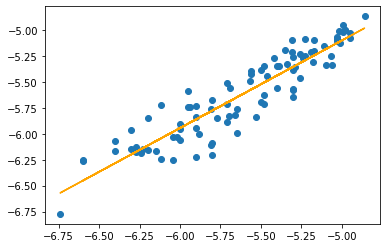

In [22]:
from sklearn.linear_model import LinearRegression
y = homo_exp_andres
X = homo_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

plt.scatter(X,y)
plt.plot(X,predict, color='orange')
plt.show()

##KNN

[0.39458411 0.02220162]
0.3635553723077777
0.3902819593651416


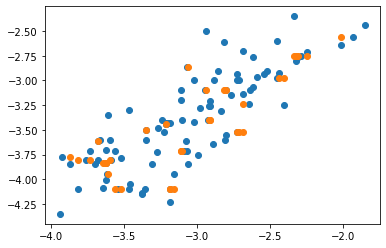

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = np.array(data5['LUMO_calc']).reshape(-1,1)
y = np.array(data5['LUMO_exp']).reshape(-1,1)
  
scaler = Normalizer()
scaler1= StandardScaler()
knn = KNeighborsRegressor(n_neighbors=1, weights='distance')
pipeline = make_pipeline(scaler1, knn)

X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
pipeline.fit(X_train, y_train)
print(cross_val_score(pipeline, X_train, y_train, cv=2))

predict = pipeline.predict(X_test)

plt.scatter(X, y)
print(pipeline.score(X_test, y_test))
print(mean_squared_error(y_test, predict)**(1/2))
plt.scatter(X_test, predict)


plt.show()

#Scharber model

In [24]:
from math import exp
#e = -1.6 * 10**-19 #units: C
Eg = abs(-6.2060) - abs(-3.7565)
Voc = Eg - 0.3  #units: J/C or V
A = 85.02
a2 = 0.09097
b2 = -2.14
dj = 38.69
Jph = A - dj * Eg + a2*exp(-b2 * Eg)
print(Jph, Voc)
Jsc = 0.65*Jph
PCE = 100*(Voc*0.65*Jsc)/100
PCE

7.445321408328493 2.1495000000000006


6.761571010142888

In [25]:
e = -1.6 * 10**-19
Eg = abs(-5.2) - abs(data6['LUMO_calc'] )
Voc = Eg - 0.3
A = 85.02
a2 = 0.09097
b2 = -2.14
dj = 38.69
Jph = A - dj * Eg + a2*np.exp(-b2 * Eg)
Jsc = 0.65*Jph
PCE = 100*(Voc*0.65*Jsc)/100
print(pd.concat([pd.DataFrame(PCE), data6['PCE_calc']], axis=1, sort=False))

    LUMO_calc  PCE_calc
0   15.058360  2.746719
1   15.206516  2.737661
2   15.284318  3.900138
3   14.790461  5.592203
4   14.949446  4.204648
5   13.064201  0.000000
6   14.370898  7.516368
7   10.334943  0.348528
8   10.334943  0.381334
9    9.081644  1.357355
10  10.968455  0.600258
11  10.169012  1.276996
12  14.630242  2.689413
13  13.066113  3.540078
14  14.277957  4.410984
15   7.526970  0.000000
16   7.778929  0.000000
17   7.278361  0.000000
18  11.892850  0.000000
19   7.278361  0.000000
20  13.744700  3.912061
21   9.681626  3.537138
22   7.475397  0.000000
23  15.195009  3.242995
24  15.280462  2.751779
25  13.032259  4.179500
26   7.961043  2.239176
27   8.224828  2.036717
28   7.961043  2.746065
29   7.109575  3.774157
30  14.695703  1.165021
31  10.030780  4.410887
32   7.488437  3.660922
33  13.531637  2.176211
34  14.181565  6.415827
35  14.695703  6.192412
36  12.765188  8.684397
37   7.488437  0.000000
38   9.093865  4.184584
39  13.531637  9.545759
40   6.852039  0

In [26]:
data6.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key                 49 non-null     int64  
 1   name                49 non-null     object 
 2   donor               49 non-null     object 
 3   smiles              49 non-null     object 
 4   HOMO_calc           49 non-null     float64
 5   LUMO_calc           49 non-null     float64
 6   PCE_exp             49 non-null     float64
 7   Source              25 non-null     object 
 8   HOMO_calib          49 non-null     float64
 9   LUMO_calib          49 non-null     float64
 10  PCE_calc            49 non-null     float64
 11  PCE_calib           49 non-null     float64
 12  molW                49 non-null     float64
 13  PCE_calib_plus      49 non-null     float64
 14  PCE_calib_plus_std  49 non-null     float64
dtypes: float64(10), int64(1), object(4)
memory us

array([[&lt;AxesSubplot:title={&#39;center&#39;:&#39;key&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;HOMO_calc&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;LUMO_calc&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_exp&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;HOMO_calib&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;LUMO_calib&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calc&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calib&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;molW&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calib_plus&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calib_plus_std&#39;}&gt;,
        &lt;AxesSubplot:&gt;]], dtype=object)

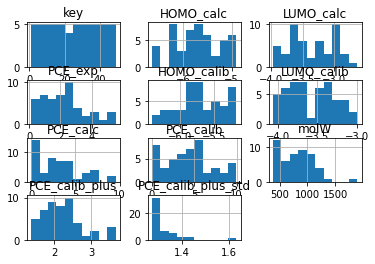

In [27]:
data6.hist()

&lt;matplotlib.collections.PathCollection at 0x7fa9414a0410&gt;

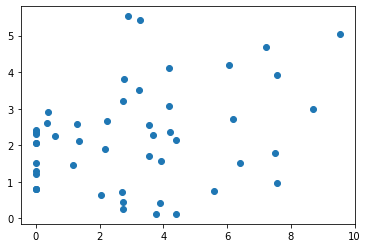

In [28]:
plt.scatter(data6['PCE_calc'], data6['PCE_exp'])

0.6231593849884487
0.8400042466692315


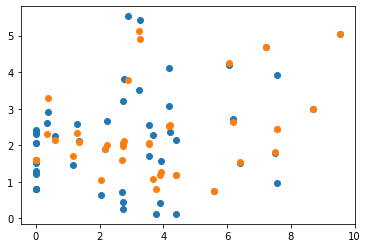

In [29]:
X = data6['PCE_calc']
y = data6['PCE_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold

gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)


kf = KFold(n_splits=25, shuffle=True, random_state=53)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['PCE_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['PCE_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['PCE_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['PCE_exp']).reshape(-1, 1)
    #Train the model
    gpr.fit(X_train, y_train) #Training the model

predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

In [30]:
pce_exp_andres = pd.DataFrame(predict, columns=['PCE_cal_Andres'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])

pce_data =  pd.concat([pce_exp_andres, pce_exp], axis=1, sort=False)
pce_data

,PCE_cal_Andres,PCE_exp
0,2.058578,0.25
1,1.977871,3.20
2,1.195549,0.41
3,0.748674,0.76
4,2.539894,2.35
5,1.601158,1.50
6,1.810349,1.80
7,2.300781,2.61
8,3.281663,2.90
9,2.092736,2.12


0.6238643386862354
0.6523363746037586


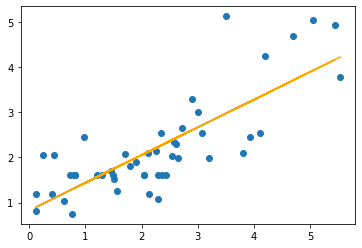

In [31]:
from sklearn.linear_model import LinearRegression
y = pce_exp_andres
X = pce_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
plt.scatter(X,y)


print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))
plt.plot(X,predict, color='orange')
plt.show()

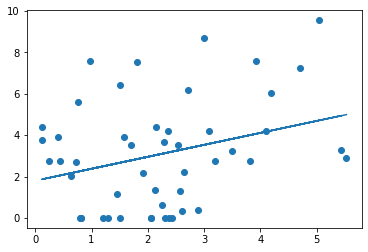

0.09136519710571045
2.490917738332346


In [32]:
pce_cal = pd.DataFrame(data6, columns=['PCE_calc'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])

from sklearn.linear_model import LinearRegression
y = pce_cal
X = pce_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predict)
plt.show()

print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

In [33]:
pce_calib = pd.DataFrame(data6, columns=['PCE_calib'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])
pce_calc = pd.DataFrame(data6, columns=['PCE_calc'])

pce_data =  pd.concat([pce_calib, pce_exp, pce_calc], axis=1, sort=False)
pce_data

,PCE_calib,PCE_exp,PCE_calc
0,5.858438,0.25,2.746719
1,4.883912,3.20,2.737661
2,6.141742,0.41,3.900138
3,7.021113,0.76,5.592203
4,5.937610,2.35,4.204648
5,0.000000,1.50,0.000000
6,9.990581,1.80,7.516368
7,1.096937,2.61,0.348528
8,1.286165,2.90,0.381334
9,3.175592,2.12,1.357355


In [34]:
data6.head()

,key,name,donor,smiles,HOMO_calc,LUMO_calc,PCE_exp,Source,HOMO_calib,LUMO_calib,PCE_calc,PCE_calib,molW,PCE_calib_plus,PCE_calib_plus_std
0,1,1,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6ccc(c7ccc(...,-6.2060,-3.7565,0.25,NaN,-5.769127,-3.818783,2.746719,5.858438,418.408,1.376496,1.331254
1,2,2,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(-n6c(=O)c7ccc8c9ccc...,-6.2310,-3.8095,3.20,NaN,-5.918082,-4.044682,2.737661,4.883912,806.746,2.130566,1.275193
2,3,3,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc(...,-6.0405,-3.8651,0.41,NaN,-5.750096,-3.868918,3.900138,6.141742,916.927,2.298419,1.280298
3,4,4,P3HT,COc1cc2c(=O)n(C)c(=O)c3ccc4c5c(-c6ccc(-c7cc8c(...,-5.7617,-3.6931,0.76,NaN,-5.654797,-3.843035,5.592203,7.021113,1037.031,2.560097,1.292685
4,5,5,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc8...,-5.9508,-3.7279,2.35,NaN,-5.733852,-3.721853,4.204648,5.937610,1149.187,2.793039,1.296141


#Carga Final archivos git

In [66]:
!git status

On branch master
Changes not staged for commit:
  (use &quot;git add/rm &lt;file&gt;...&quot; to update what will be committed)
  (use &quot;git checkout -- &lt;file&gt;...&quot; to discard changes in working directory)

	deleted:    ../docs/abstract.docx
	deleted:    ../docs/articuloML.pdf
	deleted:    ../docs/articuloML.tex
	deleted:    ../docs/avanceArticuloML.pdf
	deleted:    ../docs/avanceArticuloML.tex
	deleted:    ../docs/chemistry/Orca files/start/water.out
	deleted:    ../docs/chemistry/Orca files/start/water1.engrad
	deleted:    ../docs/chemistry/Orca files/start/water1.gbw
	deleted:    ../docs/chemistry/Orca files/start/water1.inp
	deleted:    ../docs/chemistry/Orca files/start/water1.opt
	deleted:    ../docs/chemistry/Orca files/start/water1.prop
	deleted:    ../docs/chemistry/Orca files/start/water1.trj
	deleted:    ../docs/chemistry/Orca files/start/water1.xyz
	deleted:    ../docs/chemistry/Orca files/start/water1_property.txt
	modified:   ../docs/presentacion.pptx
	delet

In [36]:
#!git reset --hard origin/master

In [37]:
#!git pull origin master; git add .; git commit -m "Carga de archivos desde Jupyter in VM, fecha: `date`"; git push origin master

#Pruebas

##Confirmación valores MMFF

[(0, -63.81407450655977)]


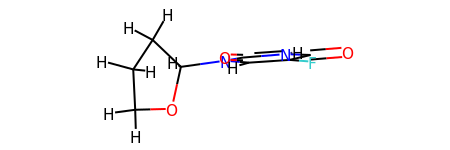

In [38]:
#for smiles in smiles_molecules:
m_pruebas = Chem.MolFromSmiles('FC1=CN(C2CCCO2)C(=O)NC1=O')  
m_pruebas = Chem.AddHs(m_pruebas)
AllChem.EmbedMolecule(m_pruebas)
ff = AllChem.MMFFOptimizeMoleculeConfs(m_pruebas, maxIters=10000)
print(ff)
m_pruebas

##Método DFT

In [39]:
from math import exp
#e = -1.6 * 10**-19 #units: C
Eg = abs(-6.2060) - abs(-3.7565)
Voc = Eg - 0.3  #units: J/C or V
A = 85.02
a2 = 0.09097
b2 = -2.14
dj = 38.69
Jph = A - dj * Eg + a2*exp(-b2 * Eg)
print(Jph, Voc)
Jsc = 0.65*Jph
PCE = 100*(Voc*0.65*Jsc)/100
PCE

7.445321408328493 2.1495000000000006


6.761571010142888

In [40]:
e = -1.6 * 10**-19
Eg = abs(-5.2) - abs(data6['LUMO_calc'] )
Voc = Eg - 0.3
A = 85.02
a2 = 0.09097
b2 = -2.14
dj = 38.69
Jph = A - dj * Eg + a2*np.exp(-b2 * Eg)
Jsc = 0.65*Jph
PCE = 100*(Voc*0.65*Jsc)/100
print(pd.concat([pd.DataFrame(PCE), data6['PCE_calc']], axis=1, sort=False))

    LUMO_calc  PCE_calc
0   15.058360  2.746719
1   15.206516  2.737661
2   15.284318  3.900138
3   14.790461  5.592203
4   14.949446  4.204648
5   13.064201  0.000000
6   14.370898  7.516368
7   10.334943  0.348528
8   10.334943  0.381334
9    9.081644  1.357355
10  10.968455  0.600258
11  10.169012  1.276996
12  14.630242  2.689413
13  13.066113  3.540078
14  14.277957  4.410984
15   7.526970  0.000000
16   7.778929  0.000000
17   7.278361  0.000000
18  11.892850  0.000000
19   7.278361  0.000000
20  13.744700  3.912061
21   9.681626  3.537138
22   7.475397  0.000000
23  15.195009  3.242995
24  15.280462  2.751779
25  13.032259  4.179500
26   7.961043  2.239176
27   8.224828  2.036717
28   7.961043  2.746065
29   7.109575  3.774157
30  14.695703  1.165021
31  10.030780  4.410887
32   7.488437  3.660922
33  13.531637  2.176211
34  14.181565  6.415827
35  14.695703  6.192412
36  12.765188  8.684397
37   7.488437  0.000000
38   9.093865  4.184584
39  13.531637  9.545759
40   6.852039  0

In [41]:
data6.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key                 49 non-null     int64  
 1   name                49 non-null     object 
 2   donor               49 non-null     object 
 3   smiles              49 non-null     object 
 4   HOMO_calc           49 non-null     float64
 5   LUMO_calc           49 non-null     float64
 6   PCE_exp             49 non-null     float64
 7   Source              25 non-null     object 
 8   HOMO_calib          49 non-null     float64
 9   LUMO_calib          49 non-null     float64
 10  PCE_calc            49 non-null     float64
 11  PCE_calib           49 non-null     float64
 12  molW                49 non-null     float64
 13  PCE_calib_plus      49 non-null     float64
 14  PCE_calib_plus_std  49 non-null     float64
dtypes: float64(10), int64(1), object(4)
memory us

array([[&lt;AxesSubplot:title={&#39;center&#39;:&#39;key&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;HOMO_calc&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;LUMO_calc&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_exp&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;HOMO_calib&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;LUMO_calib&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calc&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calib&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;molW&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calib_plus&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;PCE_calib_plus_std&#39;}&gt;,
        &lt;AxesSubplot:&gt;]], dtype=object)

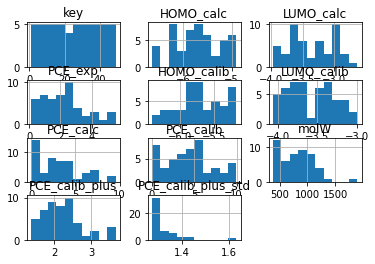

In [42]:
data6.hist()

&lt;matplotlib.collections.PathCollection at 0x7fa93ae71310&gt;

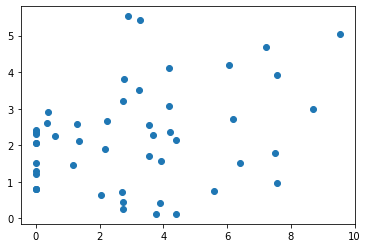

In [43]:
plt.scatter(data6['PCE_calc'], data6['PCE_exp'])

0.6231593849884487
0.8400042466692315


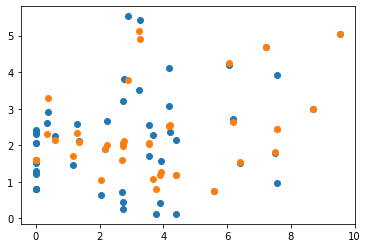

In [44]:
X = data6['PCE_calc']
y = data6['PCE_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold

gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)


kf = KFold(n_splits=25, shuffle=True, random_state=53)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['PCE_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['PCE_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['PCE_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['PCE_exp']).reshape(-1, 1)
    #Train the model
    gpr.fit(X_train, y_train) #Training the model

predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

In [45]:
pce_exp_andres = pd.DataFrame(predict, columns=['PCE_cal_Andres'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])

pce_data =  pd.concat([pce_exp_andres, pce_exp], axis=1, sort=False)
pce_data

,PCE_cal_Andres,PCE_exp
0,2.058578,0.25
1,1.977871,3.20
2,1.195549,0.41
3,0.748674,0.76
4,2.539894,2.35
5,1.601158,1.50
6,1.810349,1.80
7,2.300781,2.61
8,3.281663,2.90
9,2.092736,2.12


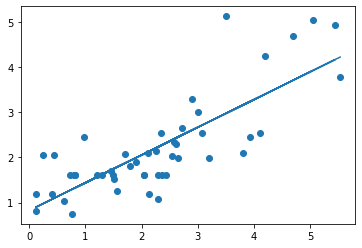

0.6238643386862354
0.6523363746037586


In [46]:
from sklearn.linear_model import LinearRegression
y = pce_exp_andres
X = pce_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predict)
plt.show()

print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

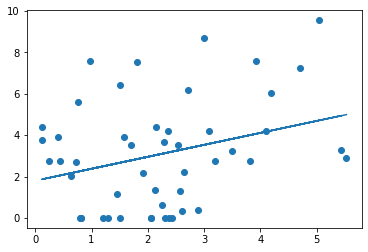

0.09136519710571045
2.490917738332346


In [47]:
pce_cal = pd.DataFrame(data6, columns=['PCE_calc'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])

from sklearn.linear_model import LinearRegression
y = pce_cal
X = pce_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predict)
plt.show()

print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

In [48]:
pce_calib = pd.DataFrame(data6, columns=['PCE_calib'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])
pce_calc = pd.DataFrame(data6, columns=['PCE_calc'])

pce_data =  pd.concat([pce_calib, pce_exp, pce_calc], axis=1, sort=False)
pce_data

,PCE_calib,PCE_exp,PCE_calc
0,5.858438,0.25,2.746719
1,4.883912,3.20,2.737661
2,6.141742,0.41,3.900138
3,7.021113,0.76,5.592203
4,5.937610,2.35,4.204648
5,0.000000,1.50,0.000000
6,9.990581,1.80,7.516368
7,1.096937,2.61,0.348528
8,1.286165,2.90,0.381334
9,3.175592,2.12,1.357355


In [49]:
data6.head()

,key,name,donor,smiles,HOMO_calc,LUMO_calc,PCE_exp,Source,HOMO_calib,LUMO_calib,PCE_calc,PCE_calib,molW,PCE_calib_plus,PCE_calib_plus_std
0,1,1,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6ccc(c7ccc(...,-6.2060,-3.7565,0.25,NaN,-5.769127,-3.818783,2.746719,5.858438,418.408,1.376496,1.331254
1,2,2,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(-n6c(=O)c7ccc8c9ccc...,-6.2310,-3.8095,3.20,NaN,-5.918082,-4.044682,2.737661,4.883912,806.746,2.130566,1.275193
2,3,3,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc(...,-6.0405,-3.8651,0.41,NaN,-5.750096,-3.868918,3.900138,6.141742,916.927,2.298419,1.280298
3,4,4,P3HT,COc1cc2c(=O)n(C)c(=O)c3ccc4c5c(-c6ccc(-c7cc8c(...,-5.7617,-3.6931,0.76,NaN,-5.654797,-3.843035,5.592203,7.021113,1037.031,2.560097,1.292685
4,5,5,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc8...,-5.9508,-3.7279,2.35,NaN,-5.733852,-3.721853,4.204648,5.937610,1149.187,2.793039,1.296141


&lt;matplotlib.collections.PathCollection at 0x7fa93ad69ed0&gt;

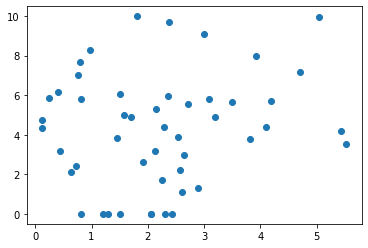

In [50]:
plt.scatter(data6['PCE_exp'], data6['PCE_calib'])
